## BGEN Sample and Variant Metadata EDA

#### Sample EDA

In [ ]:
import pandas as pd

In [4]:
files = !gsutil ls gs://rs-ukb/raw-data/gt-imputation/*.sample

In [5]:
files

['gs://rs-ukb/raw-data/gt-imputation/ukb59384_imp_chr10_v3_s487296.sample',
 'gs://rs-ukb/raw-data/gt-imputation/ukb59384_imp_chr11_v3_s487296.sample',
 'gs://rs-ukb/raw-data/gt-imputation/ukb59384_imp_chr12_v3_s487296.sample',
 'gs://rs-ukb/raw-data/gt-imputation/ukb59384_imp_chr13_v3_s487296.sample',
 'gs://rs-ukb/raw-data/gt-imputation/ukb59384_imp_chr14_v3_s487296.sample',
 'gs://rs-ukb/raw-data/gt-imputation/ukb59384_imp_chr15_v3_s487296.sample',
 'gs://rs-ukb/raw-data/gt-imputation/ukb59384_imp_chr16_v3_s487296.sample',
 'gs://rs-ukb/raw-data/gt-imputation/ukb59384_imp_chr17_v3_s487296.sample',
 'gs://rs-ukb/raw-data/gt-imputation/ukb59384_imp_chr18_v3_s487296.sample',
 'gs://rs-ukb/raw-data/gt-imputation/ukb59384_imp_chr19_v3_s487296.sample',
 'gs://rs-ukb/raw-data/gt-imputation/ukb59384_imp_chr1_v3_s487296.sample',
 'gs://rs-ukb/raw-data/gt-imputation/ukb59384_imp_chr20_v3_s487296.sample',
 'gs://rs-ukb/raw-data/gt-imputation/ukb59384_imp_chr21_v3_s487296.sample',
 'gs://rs-ukb

In [6]:
def load(path):
    cols = [("id1", "int32"), ("id2", "int32"), ("missing", str), ("sex", str)]
    return pd.read_csv(
        path,
        sep=" ",
        dtype=dict(cols),
        names=[c[0] for c in cols],
        header=0,
        skiprows=1,  # Skip the first non-header row
    )

In [15]:
pd.set_option('max.info_rows', 100000000)
df = pd.concat([
    load(path).assign(file=path.split('/')[-1])
    for path in files
])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11696198 entries, 0 to 486756
Data columns (total 5 columns):
 #   Column   Non-Null Count     Dtype 
---  ------   --------------     ----- 
 0   id1      11696198 non-null  int32 
 1   id2      11696198 non-null  int32 
 2   missing  11696198 non-null  object
 3   sex      11696198 non-null  object
 4   file     11696198 non-null  object
dtypes: int32(2), object(3)
memory usage: 446.2+ MB


In [13]:
df.groupby('file').size()

file
ukb59384_imp_chr10_v3_s487296.sample    487409
ukb59384_imp_chr11_v3_s487296.sample    487409
ukb59384_imp_chr12_v3_s487296.sample    487409
ukb59384_imp_chr13_v3_s487296.sample    487409
ukb59384_imp_chr14_v3_s487296.sample    487409
ukb59384_imp_chr15_v3_s487296.sample    487409
ukb59384_imp_chr16_v3_s487296.sample    487409
ukb59384_imp_chr17_v3_s487296.sample    487409
ukb59384_imp_chr18_v3_s487296.sample    487409
ukb59384_imp_chr19_v3_s487296.sample    487409
ukb59384_imp_chr1_v3_s487296.sample     487409
ukb59384_imp_chr20_v3_s487296.sample    487409
ukb59384_imp_chr21_v3_s487296.sample    487409
ukb59384_imp_chr22_v3_s487296.sample    487409
ukb59384_imp_chr2_v3_s487296.sample     487409
ukb59384_imp_chr3_v3_s487296.sample     487409
ukb59384_imp_chr4_v3_s487296.sample     487409
ukb59384_imp_chr5_v3_s487296.sample     487409
ukb59384_imp_chr6_v3_s487296.sample     487409
ukb59384_imp_chr7_v3_s487296.sample     487409
ukb59384_imp_chr8_v3_s487296.sample     487409
ukb59384

In [14]:
(df['id1'] == df['id2']).value_counts()

True    11696198
dtype: int64

In [16]:
df['missing'].value_counts()

0    11696198
Name: missing, dtype: int64

In [17]:
df['sex'].value_counts()

2    6342279
1    5351185
0       2734
Name: sex, dtype: int64

In [30]:
df['id1'].max()

6025055

#### Variant EDA

Run w/ 32 cpus + 128 G RAM.

In [ ]:
import os
import os.path as osp
os.environ['JAVA_HOME'] = osp.join(os.environ['CONDA_PREFIX'].replace('ukb-analysis', 'pyspark'), 'jre')
os.environ['SPARK_DRIVER_MEMORY'] = '100G'
from pyspark.sql.session import SparkSession
from pyspark.sql.types import StringType, StructType, IntegerType, FloatType, StructField
import pyspark.sql.functions as F
spark = SparkSession.builder.config('spark.driver.maxResultSize', '10G').getOrCreate()

In [2]:
!gsutil -m cp gs://rs-ukb/raw-data/gt-imputation/ukb_mfi_chr*_v3.txt $HOME/data/rs-ukb-local/bgen/meta/

Copying gs://rs-ukb/raw-data/gt-imputation/ukb_mfi_chr10_v3.txt...
==> NOTE: You are downloading one or more large file(s), which would            
run significantly faster if you enabled sliced object downloads. This
feature is enabled by default but requires that compiled crcmod be
installed (see "gsutil help crcmod").

Copying gs://rs-ukb/raw-data/gt-imputation/ukb_mfi_chr11_v3.txt...
Copying gs://rs-ukb/raw-data/gt-imputation/ukb_mfi_chr12_v3.txt...              
Copying gs://rs-ukb/raw-data/gt-imputation/ukb_mfi_chr13_v3.txt...              
Copying gs://rs-ukb/raw-data/gt-imputation/ukb_mfi_chr14_v3.txt...              
Copying gs://rs-ukb/raw-data/gt-imputation/ukb_mfi_chr15_v3.txt...              
Copying gs://rs-ukb/raw-data/gt-imputation/ukb_mfi_chr16_v3.txt...              
Copying gs://rs-ukb/raw-data/gt-imputation/ukb_mfi_chr17_v3.txt...              
Copying gs://rs-ukb/raw-data/gt-imputation/ukb_mfi_chr18_v3.txt...              
Copying gs://rs-ukb/raw-data/gt-imputation

In [11]:
schema = StructType([
    StructField("id", StringType()),
    StructField("rsid", StringType()),
    StructField("position", IntegerType()),
    StructField("allele1_ref", StringType()),
    StructField("allele2_alt", StringType()),
    StructField("maf", FloatType()),
    StructField("minor_allele", StringType()),
    StructField("info", FloatType())
])
df = spark.read.csv('/home/eczech/data/rs-ukb-local/bgen/meta/*.txt', sep='\t', schema=schema)
df

DataFrame[id: string, rsid: string, position: int, allele1_ref: string, allele2_alt: string, maf: float, minor_allele: string, info: float]

In [15]:
df.count()

97059328

In [5]:
df.agg(*[F.mean(F.col(c).isNotNull().cast('int')) for c in df.columns]).toPandas()

,avg(CAST((id IS NOT NULL) AS INT)),avg(CAST((rsid IS NOT NULL) AS INT)),avg(CAST((position IS NOT NULL) AS INT)),avg(CAST((allele1_ref IS NOT NULL) AS INT)),avg(CAST((allele2_ref IS NOT NULL) AS INT)),avg(CAST((maf IS NOT NULL) AS INT)),avg(CAST((minor_allele IS NOT NULL) AS INT)),avg(CAST((info IS NOT NULL) AS INT))
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999701


In [5]:
dfr = df.filter(F.col('rsid').startswith('rs')).groupby(F.length(F.col("rsid"))).count().toPandas()
dfr

,length(rsid),count
0,6,7194
1,3,4
2,5,684
3,9,3975378
4,4,85
5,8,593915
6,7,22347
7,10,8245149
8,11,78735359


In [4]:
(
    df
    .withColumn('rslen', F.length(F.col("rsid")))
    .filter(F.col('rslen') > 100)
    .limit(10)
    .select('rsid', 'rslen')
    .show(truncate=250)
)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|                                                                                                                                                                                                                                                      rsid|rslen|
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|                                                                                         3:10282976_A_ACTCACGCCTGTAATCCCAGCACTTTGGGAGCCCCAGGCGGGTGGATCACTTGAGGTCAGGAGTTCGAGACTAGCCTGGCCAATGTCGTGAAACCCTGTCTCTACTAAAAATACAGAAAA

In [9]:
dfr = df.groupby(F.length(F.col("allele1_ref"))).count().toPandas()
dfr.sort_values('count')

,length(allele1_ref),count
14,103,1
78,98,1
5,108,1
19,111,1
57,130,1
...,...,...
48,4,279653
35,5,331843
27,3,445552
92,2,1175688


In [8]:
dfr.sort_values('length(allele1_ref)')

,length(allele1_ref),count
21,1,94434853
92,2,1175688
27,3,445552
48,4,279653
35,5,331843
...,...,...
7,101,5
14,103,1
5,108,1
19,111,1


In [13]:
dfr = df.groupby(F.length(F.col("allele2_alt"))).count().toPandas()
dfr.sort_values('count')

,length(allele2_alt),count
0,148,1
33,146,1
130,414,1
128,662,1
37,218,1
...,...,...
80,4,78205
57,5,107754
43,3,179151
149,2,812419


In [14]:
dfr.sort_values('length(allele2_alt)')

,length(allele2_alt),count
34,1,95737105
149,2,812419
43,3,179151
80,4,78205
57,5,107754
...,...,...
130,414,1
24,417,1
18,577,1
53,647,1


In [ ]:
(
    df
    .withColumn('eq_ref', F.col('minor_allele') == F.col('allele1_ref'))
    .withColumn('eq_alt', F.col('minor_allele') == F.col('allele2_alt'))
    .groupby(['eq_ref', 'eq_alt']).count().show()
)

In [28]:
dfr = df.withColumn('maf_bin', .01 * F.round(F.col('maf') / .01)).groupby('maf_bin').count().toPandas()
dfr.head()

,maf_bin,count
0,0.07,299571
1,0.47,120402
2,0.00,85139691
3,0.16,178341
4,0.18,169911


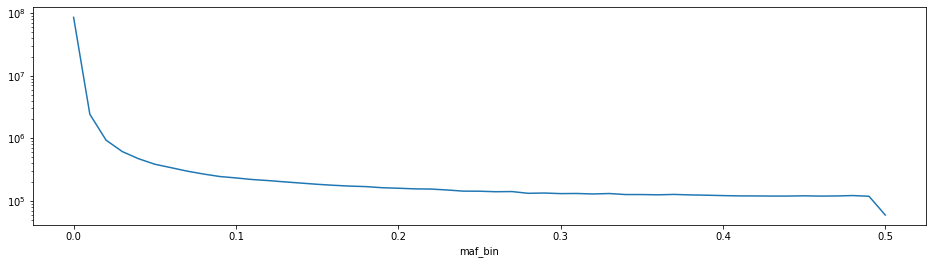

In [27]:
ax = dfr.set_index('maf_bin')['count'].sort_index().plot(figsize=(16, 4))
ax.set_yscale('log')